In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
import geohash2
print ('Geohash for 30.31876, 120.18303:', geohash2.encode(30.31876, 120.18303))
print ('Geohash for 30.31876, 120.18303:', geohash2.encode(30.31876, 120.18303, precision=10))
print ('Coordinate for Geohash wtmkqz6eee7:', geohash2.decode('wtmkqz6eee7'))


Geohash for 30.31876, 120.18303: wtmkqz6eedd2
Geohash for 30.31876, 120.18303: wtmkqz6eed
Coordinate for Geohash wtmkqz6eee7: ('30.31876', '120.18303')


[1 0 1 0 0 1 1 0 2 1 0 2 2 0 0 1 1 2 0 2 2 1 2 2 2 1 2 1 2 0 1 1 2 0 0 0 0
 1 0 0 1 0 0 0 2 1 1 1 2 0 1 2 1 1 1 0 2 0 0 0 2 0 2 2 1 1 1 0 2 1 1 0 1 0
 1 1 1 2 0 2 2 0 0 1 0 0 1 1 1 0 1 2 2 0 1 2 0 2 2 2]
cluster_centers: [[ 0.76408187 -0.8245786 ]
 [ 0.74924366  0.69657258]
 [-1.09681867 -0.71271261]]
[0 1 2]
number of estimated clusters : 3


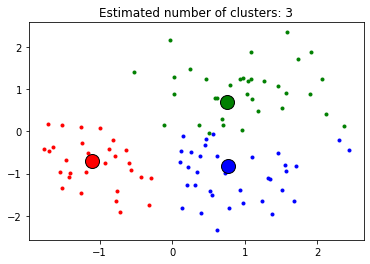

In [4]:
# -*- coding:utf-8 -*-
# Mean-Shift
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle  ##python自带的迭代器模块


##产生随机数据的中心
centers = [[1, 1], [-1, -1], [1, -1]]
##产生的数据个数
n_samples=100
##生产数据
X, _ = make_blobs(n_samples=n_samples, centers= centers, cluster_std=0.6,
                  random_state =0)

##带宽(半径),也就是以某个点为核心时的搜索半径
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
##设置均值偏移函数
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
##训练数据
ms.fit(X)
##每个点的标签
labels = ms.labels_
print(labels)
##簇中心的点的集合
cluster_centers = ms.cluster_centers_
print('cluster_centers:',cluster_centers)
##总共的标签分类
labels_unique = np.unique(labels)
print(labels_unique)
##聚簇的个数,即分类的个数
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)


##绘图
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    ##根据lables中的值是否等于k，重新组成一个True、False的数组
    my_members = labels == k
    cluster_center = cluster_centers[k]
    ##X[my_members, 0] 取出my_members对应位置为True的值的横坐标
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

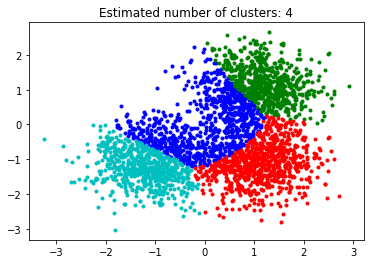

In [5]:
# Spectral Clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import spectral_clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from itertools import cycle  ##python自带的迭代器模块

##产生随机数据的中心
centers = [[1, 1], [-1, -1], [1, -1]]
##产生的数据个数
n_samples=3000
##生产数据
X, lables_true = make_blobs(n_samples=n_samples, centers= centers, cluster_std=0.6, 
                  random_state =0)

##变换成矩阵，输入必须是对称矩阵
metrics_metrix = (-1 * metrics.pairwise.pairwise_distances(X)).astype(np.int32)
metrics_metrix += -1 * metrics_metrix.min()
##设置谱聚类函数
n_clusters_= 4
lables = spectral_clustering(metrics_metrix,n_clusters=n_clusters_)

##绘图
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    ##根据lables中的值是否等于k，重新组成一个True、False的数组
    my_members = lables == k
    ##X[my_members, 0] 取出my_members对应位置为True的值的横坐标
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

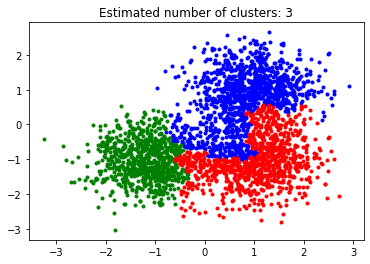

In [6]:
# Hierarchical Clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle  ##python自带的迭代器模块

##产生随机数据的中心
centers = [[1, 1], [-1, -1], [1, -1]]
##产生的数据个数
n_samples=3000
##生产数据
X, lables_true = make_blobs(n_samples=n_samples, centers= centers, cluster_std=0.6, 
                  random_state =0)


##设置分层聚类函数
linkages = ['ward', 'average', 'complete']
n_clusters_ = 3
ac = AgglomerativeClustering(linkage=linkages[2],n_clusters = n_clusters_)
##训练数据
ac.fit(X)

##每个数据的分类
lables = ac.labels_

##绘图
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    ##根据lables中的值是否等于k，重新组成一个True、False的数组
    my_members = lables == k
    ##X[my_members, 0] 取出my_members对应位置为True的值的横坐标
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

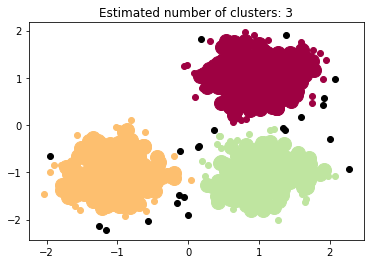

In [7]:
# DBSCAN
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle  ##python自带的迭代器模块
from sklearn.preprocessing import StandardScaler

##产生随机数据的中心
centers = [[1, 1], [-1, -1], [1, -1]]
##产生的数据个数
n_samples=750
##生产数据:此实验结果受cluster_std的影响，或者说受eps 和cluster_std差值影响
X, lables_true = make_blobs(n_samples=n_samples, centers= centers, cluster_std=0.4, 
                  random_state =0)


##设置分层聚类函数
db = DBSCAN(eps=0.3, min_samples=10)
##训练数据
db.fit(X)
##初始化一个全是False的bool类型的数组
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
'''
   这里是关键点(针对这行代码：xy = X[class_member_mask & ~core_samples_mask])：
   db.core_sample_indices_  表示的是某个点在寻找核心点集合的过程中暂时被标为噪声点的点(即周围点
   小于min_samples)，并不是最终的噪声点。在对核心点进行联通的过程中，这部分点会被进行重新归类(即标签
   并不会是表示噪声点的-1)，也可也这样理解，这些点不适合做核心点，但是会被包含在某个核心点的范围之内
'''
core_samples_mask[db.core_sample_indices_] = True

##每个数据的分类
lables = db.labels_

##分类个数：lables中包含-1，表示噪声点
n_clusters_ =len(np.unique(lables)) - (1 if -1 in lables else 0)

##绘图
unique_labels = set(lables)
'''
   1)np.linspace 返回[0,1]之间的len(unique_labels) 个数
   2)plt.cm 一个颜色映射模块
   3)生成的每个colors包含4个值，分别是rgba
   4)其实这行代码的意思就是生成4个可以和光谱对应的颜色值
'''
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(1)
plt.clf()


for k, col in zip(unique_labels, colors):
    ##-1表示噪声点,这里的k表示黑色
    if k == -1:
        col = 'k'

    ##生成一个True、False数组，lables == k 的设置成True
    class_member_mask = (lables == k)
    
    ##两个数组做&运算，找出即是核心点又等于分类k的值  markeredgecolor='k',
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', c=col,markersize=14)
    '''
       1)~优先级最高，按位对core_samples_mask 求反，求出的是噪音点的位置
       2)& 于运算之后，求出虽然刚开始是噪音点的位置，但是重新归类却属于k的点
       3)对核心分类之后进行的扩展
    '''
    xy = X[class_member_mask & ~core_samples_mask]     
    plt.plot(xy[:, 0], xy[:, 1], 'o', c=col,markersize=6)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

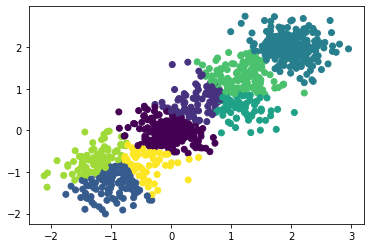

In [8]:
# Birch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch

# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1], [2,2]], cluster_std=[0.4, 0.3, 0.4, 0.3], 
                  random_state =9)

##设置birch函数
birch = Birch(n_clusters = None)
##训练数据
y_pred = birch.fit_predict(X)
##绘图
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

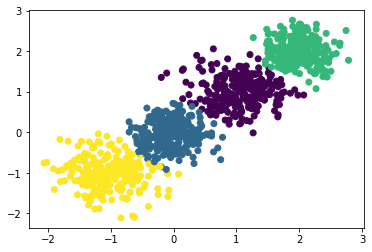

In [9]:
# GaussianMixtureModel
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1], [2,2]], cluster_std=[0.4, 0.3, 0.4, 0.3], 
                  random_state = 0)

##设置gmm函数
gmm = GaussianMixture(n_components=4, covariance_type='full').fit(X)
##训练数据
y_pred = gmm.predict(X)

##绘图
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

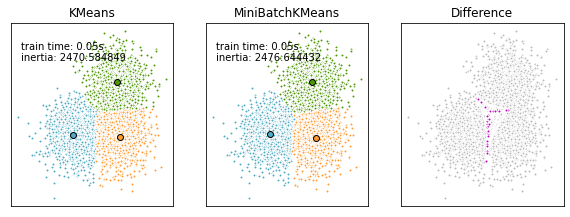

In [10]:
# KMeans和MiniBatchKMeans
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs

# #############################################################################
# 生成样本数据
np.random.seed(0)

batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

# #############################################################################
# 用Kmeans计算聚类

k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

# #############################################################################
# 用MiniBatchKMeans计算聚类

mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

# #############################################################################
# 绘图

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# MiniBatchKMeans和KMeans算法中的同一簇具有相同的颜色
k_means_cluster_centers = k_means.cluster_centers_
order = pairwise_distances_argmin(k_means.cluster_centers_,
                                  mbk.cluster_centers_)
mbk_means_cluster_centers = mbk.cluster_centers_[order]

k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' %
         (t_mini_batch, mbk.inertia_))

# 展示不同
different = (mbk_means_labels == 4)
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += ((k_means_labels == k) != (mbk_means_labels == k))

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.')
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.')
ax.set_title('Difference')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

/Users/xz/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(
Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


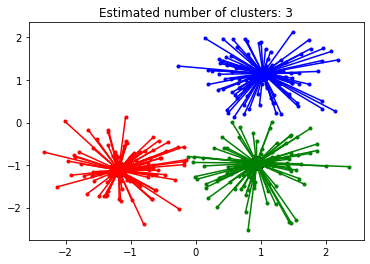

In [11]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

# #############################################################################
# 计算Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# 绘图
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()